This is necessary to access own modules.

In [1]:
import sys
sys.path.append('..')

# Build up

Here the aggregation paths get loaded.

In [2]:
from src.utils.settings import Settings

settings = Settings()
java_aggregation_path = settings.get_path(['detections', 'java_python'])
cpp_aggregation_path = settings.get_path(['detections', 'cpp_python'])
fun_aggregation_path = settings.get_path(['detections', 'fun_python'])

aggregation_paths = [java_aggregation_path, cpp_aggregation_path, fun_aggregation_path]

aggregation_paths = [p + '/detections.json' for p in aggregation_paths]

Creation of the aggregator object.  
Loading from the file system.

In [3]:
from src.python_language_analyzer.aggregator import Aggregator

aggregators = [Aggregator.load(p) for p in aggregation_paths]

Creation of the plotter object.  
The plotter takes an array of labels for plotting.

In [4]:
from src.github.plotter import Plotter

plotter = Plotter()

labels = ['Java', 'C++', 'func languages']

These are the available Detections one can filter with.

In [5]:
from src.python_language_analyzer.detectors.built_in_function_detector import BuiltInFunctionDetection
from src.python_language_analyzer.detectors.class_detector import ClassDefinitionDetection
from src.python_language_analyzer.detectors.comprehension_detector import ListComprehensionDetection, DictComprehensionDetection, SetComprehensionDetection
from src.python_language_analyzer.detectors.control_flow_detector import IfDetection

For each detection this are the available additional information keys.

In [6]:
print('built in function info keys:', BuiltInFunctionDetection.INFO_KEYS)
print('class info keys:', ClassDefinitionDetection.INFO_KEYS)
print('comprehension info keys:', ListComprehensionDetection.INFO_KEYS)
print('if info keys:', IfDetection.INFO_KEYS)

built in function info keys: ['name']
class info keys: ['name', 'method_count', 'nested']
comprehension info keys: ['generator_count']
if info keys: ['has_else', 'elseif_count']


# Plots

The aggregator has two types of aggregations:
- `percentage` which takes the `Detection` class and the aggregation level.  
This calculates the overall percentage of this detection among all detections.
- `aggregate` which takes the Detection, the field it should aggregate over and the aggregation level.
This calculates the average for each aggregation field and aggregation level.

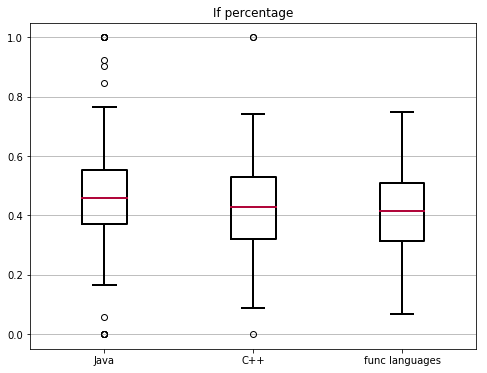

In [7]:
if_percentage = [a.percentage(IfDetection, 'user_id') for a in aggregators]
plotter(if_percentage, labels, 'If percentage', save=False, show=True)

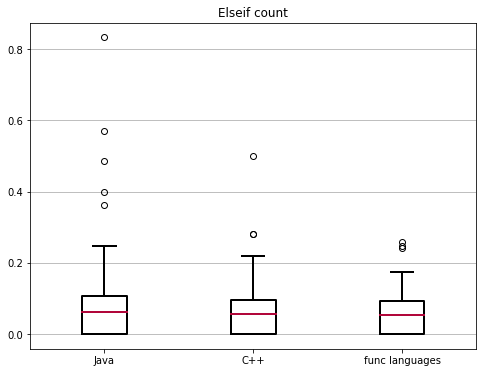

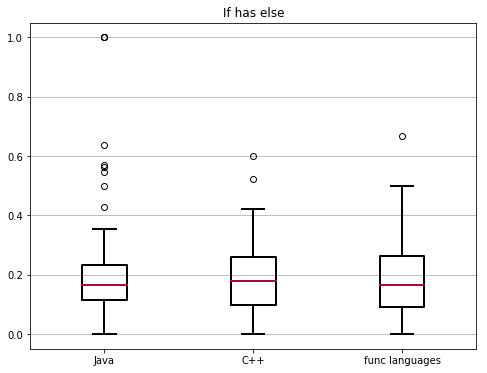

In [8]:
if_elseif_count_aggregation = [a.aggregate(IfDetection, 'elseif_count', 'user_id') for a in aggregators]
if_has_else_aggregation = [a.aggregate(IfDetection, 'has_else', 'user_id') for a in aggregators]

plotter(if_elseif_count_aggregation, labels, 'Elseif count', save=False, show=True)
plotter(if_has_else_aggregation, labels, 'If has else', save=False, show=True)

Instead of a info field one can also pass a function, that takes a detection object, as info. This calculates the desired value via the function and aggregates it.

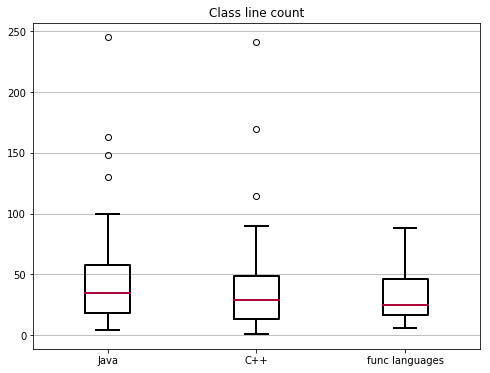

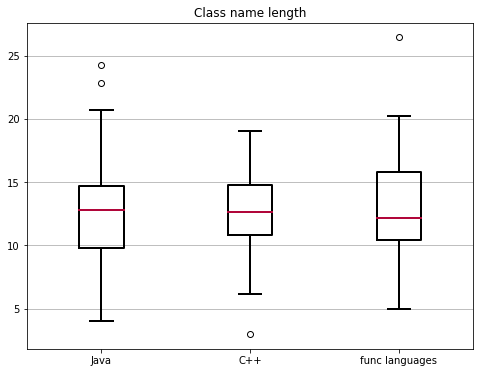

In [9]:
def line_count(detection):
    return detection.end - detection.begin + 1

def name_length(detection):
    return len(detection.name)

class_line_count_aggregation = [a.aggregate(ClassDefinitionDetection, line_count, 'user_id') for a in aggregators]
class_name_length_aggregation = [a.aggregate(ClassDefinitionDetection, name_length, 'user_id') for a in aggregators]

plotter(class_line_count_aggregation, labels, 'Class line count', save=False, show=True)
plotter(class_name_length_aggregation, labels, 'Class name length', save=False, show=True)

We can also use a callable object as info function.

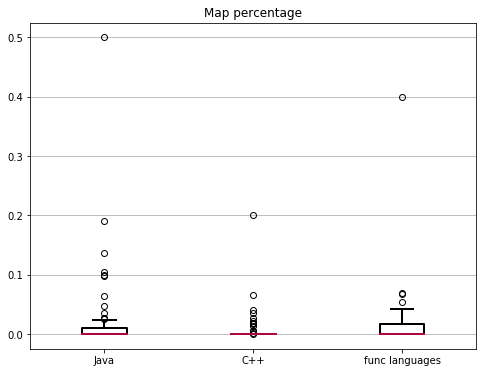

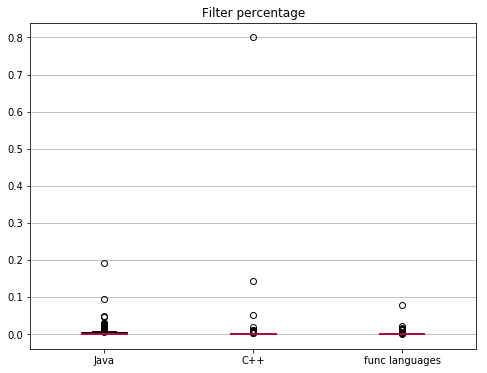

In [10]:
class IsFunction:
    def __init__(self, name):
        self.name = name

    def __call__(self, detection):
        return 1 if detection.name == self.name else 0

bif_map_count_aggregation = [a.aggregate(BuiltInFunctionDetection, IsFunction('map'), 'user_id') for a in aggregators]
bif_filter_count_aggregation = [a.aggregate(BuiltInFunctionDetection, IsFunction('filter'), 'user_id') for a in aggregators]

plotter(bif_map_count_aggregation, labels, 'Map percentage', save=False, show=True)
plotter(bif_filter_count_aggregation, labels, 'Filter percentage', save=False, show=True)

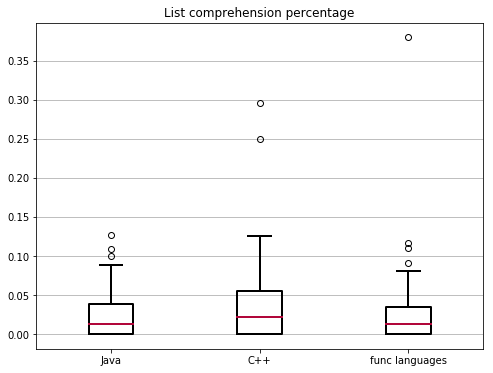

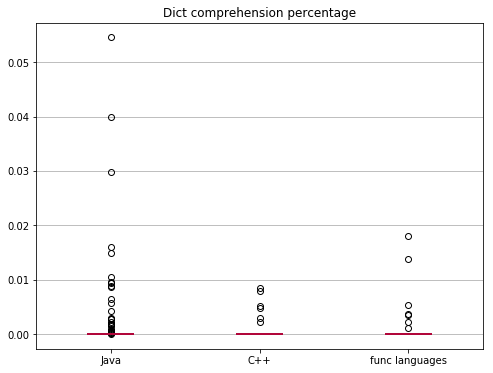

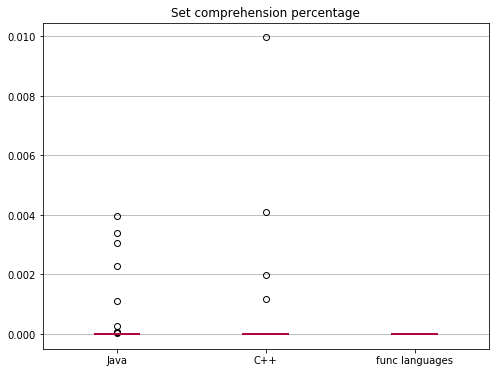

In [11]:
list_comprehension_percentage = [a.percentage(ListComprehensionDetection, 'user_id') for a in aggregators]
dict_comprehension_percentage = [a.percentage(DictComprehensionDetection, 'user_id') for a in aggregators]
set_comprehension_percentage = [a.percentage(SetComprehensionDetection, 'user_id') for a in aggregators]

list_comprehension_generator_count_aggregation = [a.aggregate(ListComprehensionDetection, 'generator_count', 'user_id') for a in aggregators]
dict_comprehension_generator_count_aggregation = [a.aggregate(DictComprehensionDetection, 'generator_count', 'user_id') for a in aggregators]
set_comprehension_generator_count_aggregation = [a.aggregate(SetComprehensionDetection, 'generator_count', 'user_id') for a in aggregators]

plotter(list_comprehension_percentage, labels, 'List comprehension percentage')
plotter(dict_comprehension_percentage, labels, 'Dict comprehension percentage')
plotter(set_comprehension_percentage, labels, 'Set comprehension percentage')